In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# v = [C2, CP, M, pM, Y, YP]


# Rate Constants
k1aaCT  = 0.015
k2      = 0
k3CT    = 200
k4      = 180 # adjustable
k4prime = 0.018
k5tilP  = 0
k6      = 1 # adjustable
k7      = 0.6
k8tilP  = 50 # >> k9
k9      = 10 # >> k6


# Initial Conditions
C20 = 0.015
CP0 = 0.015
pM0 = 0.001
M0  = 0.001
Y0  = 0.005
YP0 = 0.005
t0 = 0
tf = 30


def system(t, v):
    dC2 = k6*v[2] - k8tilP*v[0] + k9*v[1]
    dCP = -k3CT*v[1]*v[4]/(v[0]+v[1]+v[2]+v[3]) + k8tilP*v[0] - k9*v[1]
    dpM = k3CT*v[1]*v[4]/(v[0]+v[1]+v[2]+v[3]) - v[3]*(k4prime + k4*v[2]/(v[0] + v[1])**2) + k5tilP*v[2]
    dM  = v[3]*(k4prime + k4*v[2]/(v[0] + v[1])**2) - k5tilP*v[2] - k6*v[2]
    dY  = k1aaCT*(v[0]+v[1]+v[2]+v[3]) - k2*v[4] - k3CT*v[1]*v[4]/(v[0]+v[1]+v[2]+v[3])
    dYP = k6*v[2] - k7*v[5]
    return [dC2, dCP, dpM, dM, dY, dYP]

solution = solve_ivp(system, (t0, tf), [C20, CP0, pM0, M0, Y0, YP0])


C2 = solution.y[0]
CP = solution.y[1]
pM = solution.y[2]
M  = solution.y[3]
Y  = solution.y[4]
YP = solution.y[5]

YT = Y + YP + pM + M
CT = C2 + CP + pM + M

    

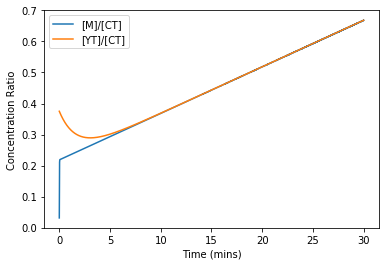

In [3]:
plt.plot(solution.t, M/CT, label='[M]/[CT]')
plt.plot(solution.t, YT/CT, label='[YT]/[CT]')
plt.xlabel('Time (mins)')
plt.legend()
plt.ylabel('Concentration Ratio')

plt.show()

## Steady State

In [58]:
# z = [u, v, w, y]


# Rate Constants
k1aaCT  = 0.015
k2      = 0
k3CT    = 200
k4prime = 0.018
k5tilP  = 0
k7      = 0.6
k8tilP  = 50 # >> k9
k9      = 10 # >> k6


# Steady State Initial Conditions
u0 = 0.001
v0 = 0.24
w0 = 0.001
y0 = 0.26
k4 = 180
k6 = 1

t0 = 0
tf = 100


def steadystate(t, z):
    dudt = k4*(z[2] - z[0])*(k4prime/k4 + (z[0])**2) - k6*z[0]
    dvdt = k1aaCT - k2*(z[1] - z[2]) - k6*z[0]
    dwdt = k3CT*(1 - z[2])*(z[1] - z[2]) - k6*z[0]
    dydt = k1aaCT - k2*(z[1] - z[2]) - k7*(z[3] - z[1])
    
    
    return [dudt, dvdt, dwdt, dydt]

ss = solve_ivp(steadystate, (t0, tf), [u0, v0, w0, y0])


u_1 = ss.y[0]
v_1 = ss.y[1]
w_1 = ss.y[2]
y_1 = ss.y[3]
    

## Spontaneous Oscillations

In [68]:
# Spontaneous Oscillations Initial Conditions
u0 = 0.0074
v0 = 0.4
w0 = 0.4
y0 = 0.566
k4 = 180
k6 = 2

t0 = 0
tf = 100


def spontosc(t, z):
    dudt = k4*(z[2] - z[0])*(k4prime/k4 + (z[0])**2) - k6*z[0]
    dvdt = k1aaCT - k2*(z[1] - z[2]) - k6*z[0]
    dwdt = k3CT*(1 - z[2])*(z[1] - z[2]) - k6*z[0]
    dydt = k1aaCT - k2*(z[1] - z[2]) - k7*(z[3] - z[1])
    
    
    return [dudt, dvdt, dwdt, dydt]

osc = solve_ivp(spontosc, (t0, tf), [u0, v0, w0, y0])


u_2 = osc.y[0]
v_2 = osc.y[1]
w_2 = osc.y[2]
y_2 = osc.y[3]
    

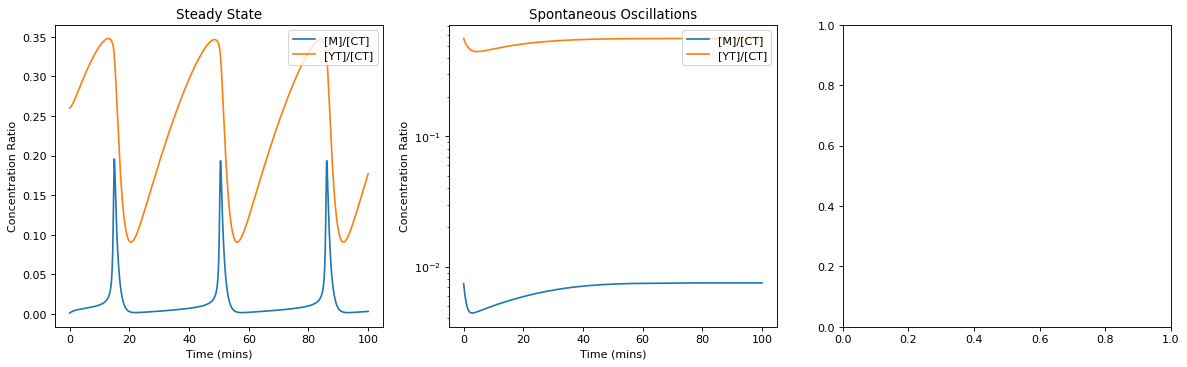

In [69]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5), dpi=80, facecolor='w', edgecolor='k')
ax1.plot(ss.t, u_1, label='[M]/[CT]')
ax1.plot(ss.t, y_1, label='[YT]/[CT]')
ax1.set_xlabel('Time (mins)')
ax1.legend(loc='upper right')
ax1.set_ylabel('Concentration Ratio')
ax1.set_title('Steady State')

ax2.plot(osc.t, u_2, label='[M]/[CT]')
ax2.plot(osc.t, y_2, label='[YT]/[CT]')
ax2.set_xlabel('Time (mins)')
ax2.legend(loc='upper right')
ax2.set_ylabel('Concentration Ratio')
ax2.set_yscale('log')
ax2.set_title('Spontaneous Oscillations')



plt.show()